<a href="https://colab.research.google.com/github/tasnimislamraisa/Python_Learning/blob/deep-Learning/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Customer Churn Prediction**

https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction?resource=download

In [55]:
import numpy as np
import pandas as pd
import os

In [56]:
df = pd.read_csv('Churn_Modelling.csv')

In [57]:
#(row,column)
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
#to check if there's any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [59]:
# sum of duplicate data
df.duplicated().sum()

0

In [60]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [61]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [62]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [63]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [64]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [66]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


# **Scale Values**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:

"""
model=Sequential()
# 1 input, 1 hidden, 1 output layer
model.add(Dense(3,activation='sigmoid',input_dim=11))

#model.add(Dense(number of node of outpot layer,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
"""

"\nmodel=Sequential()\n# 1 input, 1 hidden, 1 output layer\nmodel.add(Dense(3,activation='sigmoid',input_dim=11))\n\n#model.add(Dense(number of node of outpot layer,activation='sigmoid'))\nmodel.add(Dense(1,activation='sigmoid'))\n"

In [72]:
# For better output
#  increase number of layer and changed sigmoid func to relu

model=Sequential()
# 1 input, 1 hidden, 1 output layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))

#model.add(Dense(number of node of outpot layer,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Compilation Stage**

In [74]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [75]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5701 - loss: 0.6694 - val_accuracy: 0.7975 - val_loss: 0.4708
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7928 - loss: 0.4630 - val_accuracy: 0.8044 - val_loss: 0.4369
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8212 - loss: 0.4094 - val_accuracy: 0.8156 - val_loss: 0.4200
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8233 - loss: 0.4089 - val_accuracy: 0.8250 - val_loss: 0.4049
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8336 - loss: 0.3906 - val_accuracy: 0.8319 - val_loss: 0.3889
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: 0.3766 - val_accuracy: 0.8456 - val_loss: 0.3735
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: 0.3702 - val_accuracy: 0.8500 - val_loss: 0.3635
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - loss: 0.3536 - val_accu

In [76]:
model.layers[0].get_weights()

[array([[ 7.11021125e-02, -3.58329475e-01, -7.16475770e-02,
         -3.51727125e-04, -1.82839930e-02,  3.50841701e-01,
          7.96562806e-02, -2.57946067e-02,  1.15055941e-01,
          6.86672151e-01,  1.66757137e-01],
        [-9.11726952e-01,  3.08431000e-01, -4.53770727e-01,
          2.83436030e-01, -2.28403017e-01, -4.25082177e-01,
          9.82516184e-02,  8.69422197e-01, -6.39255166e-01,
          6.00437760e-01, -6.05369151e-01],
        [-9.27787721e-02, -2.84273446e-01,  4.02773842e-02,
         -3.42053771e-02,  1.18589856e-01,  2.20908090e-01,
          1.05587341e-01,  2.25683421e-01,  9.43064466e-02,
          3.15493315e-01,  1.42661095e-01],
        [-3.24044265e-02, -1.73458308e-01, -2.59440780e-01,
          2.18737170e-01, -8.55469227e-01, -3.06113064e-01,
          2.32533753e-01, -4.88666177e-01,  2.71522462e-01,
          2.95201056e-02, -4.34588373e-01],
        [ 4.04794604e-01, -7.74631858e-01,  4.52163190e-01,
          3.34874004e-01, -7.61878937e-02, -

In [77]:
model.layers[1].get_weights()

[array([[-1.29820153e-01, -1.07102406e+00,  3.76819730e-01,
          2.18733042e-01, -9.54569399e-01, -4.01810892e-02,
         -5.16097486e-01,  3.92908156e-01,  4.43618633e-02,
         -5.48757434e-01,  4.90876377e-01],
        [-3.57409790e-02,  2.80444294e-01, -1.75963402e-01,
         -2.33900666e-01,  5.93826883e-02,  3.11340004e-01,
          4.53937292e-01, -2.21806720e-01,  3.70651573e-01,
         -5.99293076e-02, -7.19015479e-01],
        [ 1.34669751e-01, -1.13157675e-01,  1.45629391e-01,
          2.97632609e-02,  5.05901337e-01,  3.47054213e-01,
         -8.89150202e-01,  5.77888131e-01,  2.37186566e-01,
         -3.11603963e-01,  3.48835468e-01],
        [-4.24493551e-01,  3.64254147e-01,  8.77949297e-02,
         -1.43381745e-01, -5.26255250e-01,  4.15247411e-01,
          9.63899732e-01, -1.45384325e-02, -1.27272666e-01,
          4.26211953e-01, -3.15794051e-01],
        [ 4.68069576e-02,  5.32202840e-01, -3.64999950e-01,
          1.73534557e-01,  6.04526162e-01,  

In [78]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
# Threshold value =0.5
y_pred= np.where(y_log>0.5,1,0)


In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

In [81]:
import matplotlib.pyplot as plt

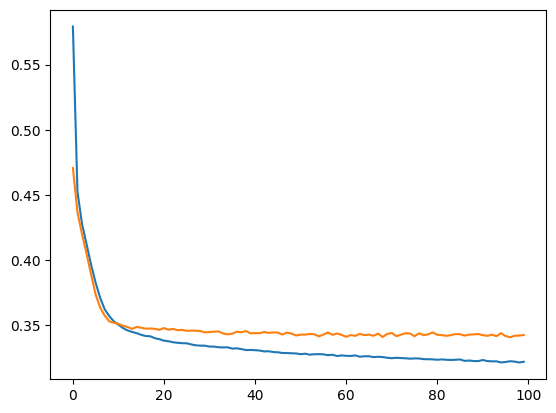

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

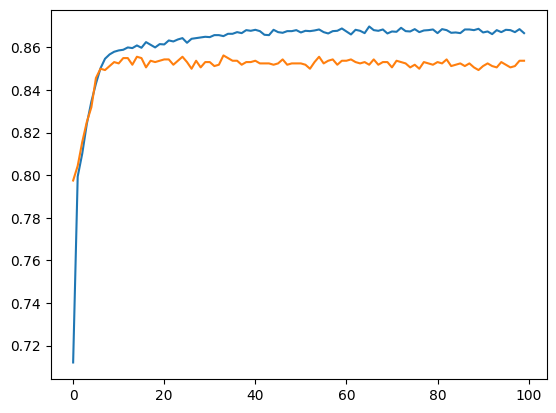

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [84]:
#  to get better accuracy
#   - increase number of epochs
#   - activation function - ReLU
#   - increase number of nodes of hidden layer
#   - increase number of  hidden layer
